In [15]:
# 노트북 내부에 그래프 출력 + 한글 깨짐 방지 (macOS용)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# macOS 기본 한글 폰트 + 마이너스 기호 깨짐 방지
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

## Categorical Naive Bayes

In [18]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

# 날씨와 온도 → 야외활동 여부 (1: O, 0: X)
X = np.array([
    ['맑음', '덥다'],
    ['흐림', '덥다'],
    ['비', '시원함'],
    ['맑음', '시원함'],
    ['흐림', '적당함'],
    ['맑음', '적당함'],
    ['비', '덥다'],
    ['흐림', '시원함'],
])
y = np.array([1, 0, 0, 1, 1, 1, 0, 1])

# 문자형 데이터 → 숫자로 변환
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# 학습/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.25, random_state=1
)

# Categorical Naive Bayes 모델 훈련
model = CategoricalNB()
model.fit(X_train, y_train)

# 정확도 확인
print(f"CategoricalNB 테스트 정확도: {model.score(X_test, y_test):.2f}")

CategoricalNB 테스트 정확도: 0.50


In [28]:
def plot_decision_categorical(X, y, model, encoder, title):
    # 🔎 범주 개수 확인
    n_categories = [len(cat) for cat in encoder.categories_]

    # 가능한 정수 조합만 생성
    x_range = np.arange(n_categories[0])
    y_range = np.arange(n_categories[1])
    xx, yy = np.meshgrid(x_range, y_range)

    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points).reshape(xx.shape)

    # 시각화
    cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.4)

    # 실제 점 찍기
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100)

    # 인코딩된 숫자를 실제 레이블로 변환해서 tick label로 표시
    plt.xticks(ticks=x_range, labels=encoder.categories_[0])
    plt.yticks(ticks=y_range, labels=encoder.categories_[1])

    plt.xlabel('날씨')
    plt.ylabel('온도')
    plt.title(title)
    plt.grid(True)
    plt.show()

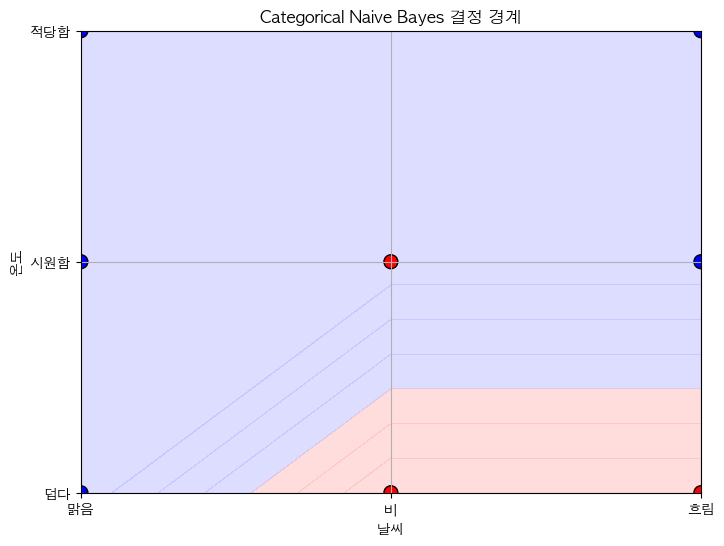

In [32]:
# 시각화 실행
plot_decision_categorical(X_encoded, y, model, encoder, 'Categorical Naive Bayes 결정 경계')

## Multinomial Naive Bayes

In [35]:
from sklearn.naive_bayes import MultinomialNB

# 인공 데이터: 각 열은 단어 '할인', '무료' 등장 횟수
X = np.array([
    [3, 0],  # '할인'만 등장 (스팸일 가능성 높음)
    [0, 4],  # '무료'만 등장
    [2, 1],  # 둘 다 조금
    [0, 0],  # 아무 단어도 없음
    [1, 3],  # '무료' 위주
    [4, 1],  # '할인' 위주
    [1, 0],  # 조금만 등장
    [0, 2],  # '무료' 적당히
])
y = np.array([1, 1, 1, 0, 1, 1, 0, 1])  # 1: 스팸, 0: 정상

In [37]:
# Multinomial Naive Bayes는 단어 등장 횟수 기반 분류
model = MultinomialNB()
model.fit(X, y)

print(f"정확도: {model.score(X, y):.2f}")

정확도: 0.75


In [39]:
def plot_decision_multinomial(X, y, model, title):
    x_min, x_max = 0, X[:, 0].max() + 2
    y_min, y_max = 0, X[:, 1].max() + 2

    # 격자 생성 (정수 count 기준)
    xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))
    
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFDDDD', '#DDDDFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100)

    plt.xlabel("'할인' 단어 등장 횟수")
    plt.ylabel("'무료' 단어 등장 횟수")
    plt.title(title)
    plt.grid(True)
    plt.show()

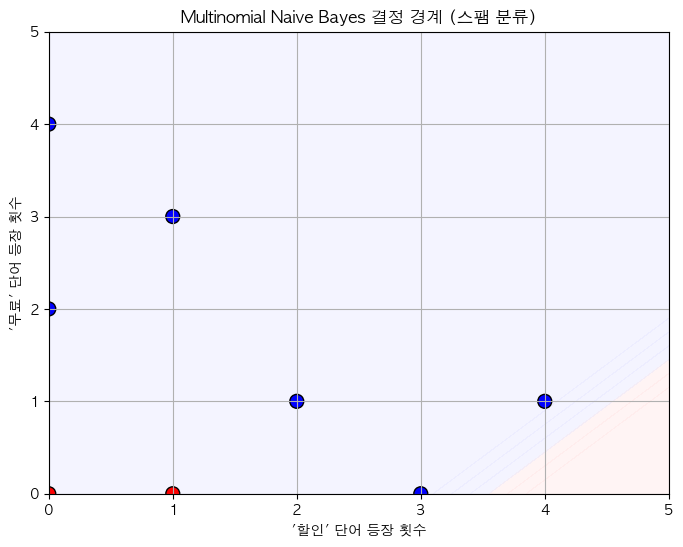

In [41]:
plot_decision_multinomial(X, y, model, "Multinomial Naive Bayes 결정 경계 (스팸 분류)")

## Gaussian Naive Bayes

In [44]:
# 필수 모듈 불러오기
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 한글 깨짐 방지 (macOS)
matplotlib.rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

# Iris 데이터 불러오기 (Setosa vs Versicolor)
iris = load_iris()
X = iris.data[:100, [0, 2]]  # 꽃받침 길이, 꽃잎 길이
y = iris.target[:100]        # 0: Setosa, 1: Versicolor

# 정규화 (GaussianNB는 정규화 없어도 되지만 시각화에 도움)
sc = StandardScaler()
X_std = sc.fit_transform(X)

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, test_size=0.25, random_state=1, stratify=y
)

# 모델 학습
model = GaussianNB()
model.fit(X_train, y_train)

# 정확도 확인
print(f"테스트 정확도: {model.score(X_test, y_test):.2f}")

테스트 정확도: 1.00


In [58]:
def plot_decision_gaussian(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # 2D meshgrid 생성
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    # 시각화
    cmap_light = ListedColormap(['#FFDDDD', '#DDDDFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=100)
    plt.xlabel('꽃받침 길이 (표준화)')
    plt.ylabel('꽃잎 길이 (표준화)')
    plt.title(title)
    plt.grid(True)
    plt.legend(handles=scatter.legend_elements()[0],
               labels=['Setosa (0)', 'Versicolor (1)'],
               loc='upper right')
    plt.show()

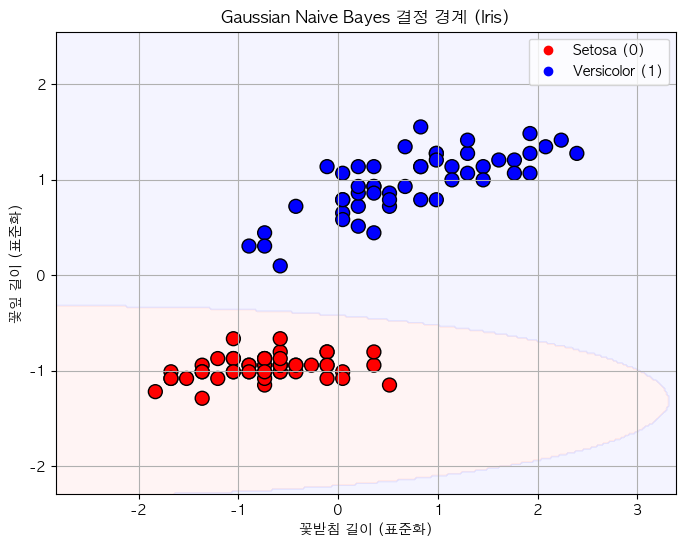

In [62]:
plot_decision_gaussian(X_std, y, model, "Gaussian Naive Bayes 결정 경계 (Iris)")